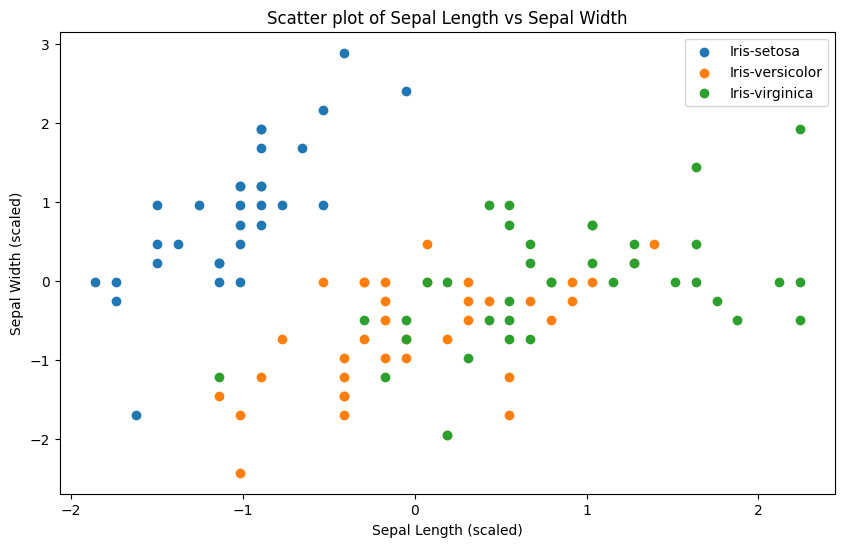

Optimal k value: 3


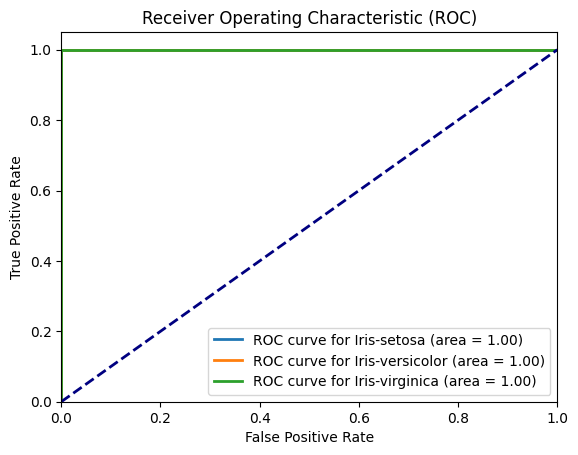

Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


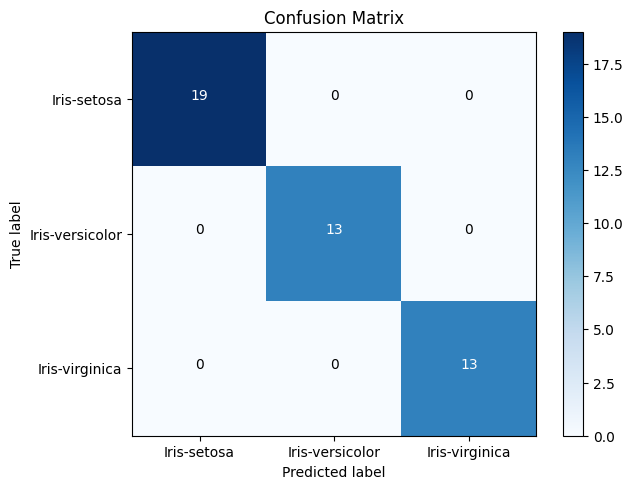

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc, confusion_matrix

# Load the dataset
iris_df = pd.read_csv("Iris.csv")

# Preprocessing the Dataset
X = iris_df.drop(['Id', 'Species'], axis=1)  # Assuming 'Id' and 'Species' columns are present
y = iris_df['Species']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Visualize the data using specific graphs
plt.figure(figsize=(10, 6))
for species in iris_df['Species'].unique():
    plt.scatter(X_train_scaled[y_train == species, 0], X_train_scaled[y_train == species, 1], label=species)
plt.xlabel('Sepal Length (scaled)')
plt.ylabel('Sepal Width (scaled)')
plt.title('Scatter plot of Sepal Length vs Sepal Width')
plt.legend()
plt.show()

# Hyperparameter Tuning - Find k value
k_values = list(range(1, 21))
cv_scores = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

optimal_k = k_values[np.argmax(cv_scores)]
print("Optimal k value:", optimal_k)

# AUC and ROC curve
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train_scaled, y_train)

# Predict probabilities for the positive class (class 1)
y_prob = knn.predict_proba(X_test_scaled)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(iris_df['Species'].unique())):
    fpr[i], tpr[i], _ = roc_curve((y_test == iris_df['Species'].unique()[i]).astype(int), y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
for i in range(len(iris_df['Species'].unique())):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve for {} (area = {:0.2f})'.format(iris_df['Species'].unique()[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Confusion Matrix
y_pred = knn.predict(X_test_scaled)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Plot Confusion Matrix
plt.figure()
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(iris_df['Species'].unique()))
plt.xticks(tick_marks, iris_df['Species'].unique())
plt.yticks(tick_marks, iris_df['Species'].unique())

threshold = conf_matrix.max() / 2.
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, format(conf_matrix[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if conf_matrix[i, j] > threshold else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
